In [ ]:
%%capture
!pip install EMD-signal

In [ ]:
from scipy.stats import skew
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert
from PyEMD import EMD
pd.options.display.precision = 10
from os import listdir

In [ ]:
# merging twenty two csv files of Low stress // 0 back
ldata = pd.concat(
    map(pd.read_csv, ['/content/p2l.csv','/content/p3l.csv','/content/p4l.csv','/content/p5l.csv','/content/p6l.csv','/content/p8l.csv','/content/p10l.csv','/content/p11l.csv','/content/p12l.csv','/content/p13l.csv','/content/p14l.csv','/content/p15l.csv','/content/p16l.csv','/content/p17l.csv','/content/p18l.csv','/content/p19l.csv','/content/p20l.csv','/content/p21l.csv','/content/p22l.csv','/content/p23l.csv','/content/p24l.csv','/content/p25l.csv']), ignore_index=True)

# merging twenty two csv files of High workload  // 3 back
hdata = pd.concat(
    map(pd.read_csv, ['/content/p2h.csv','/content/p3h.csv','/content/p4h.csv','/content/p5h.csv','/content/p6h.csv','/content/p8h.csv','/content/p10h.csv','/content/p11h.csv','/content/p12h.csv','/content/p13h.csv','/content/p14h.csv','/content/p15h.csv','/content/p16h.csv','/content/p17h.csv','/content/p18h.csv','/content/p19h.csv','/content/p20h.csv','/content/p21h.csv','/content/p22h.csv','/content/p23h.csv','/content/p24h.csv','/content/p25h.csv']), ignore_index=True)



In [ ]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(ldata)

low=pd.DataFrame(X)
low=low.iloc[:,[0,1]]
display(low.head())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,0,1
0,-1.0543760768,-0.2221835638
1,-1.0642474204,-0.2533814428
2,-1.0646766092,-0.2845793218
3,-1.0548052657,-0.3161721106
4,-1.0337750120,-0.3481598093


In [ ]:
#%%capture
setnos,f1,f2,f3,f4,f5,f6,f7,f8,labels=[],[],[],[],[],[],[],[],[],[]
sampling_rate=256    # Hz
i,j,k=0,1,1
count,c=1,0
print("For Low Mental Stress")
while k<3:
  print("\n\n\nColumn",k)
  while j<2201:
    while i<768*j:
      set=low.iloc[i:i+768,k]
      i=i+768

    signal=set.values
    time=np.arange(len(set))/sampling_rate

    # Plotting Counter
    # c=c+1
    # print("\nPlot",c)

    # Compute IMFs with EMD
    config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
    emd = EMD(**config)
    imfs = emd(signal, max_imf=10)
    print('imfs = ' + f'{imfs.shape[0]:4d}')

    # Grouping Counter
    print("\nSet",count,"captured")
    setnos.append(count)
    count=count+1

    labels.append(0)
    f1.append(np.mean(imfs[0]))
    f2.append(np.min(imfs[0]))
    f3.append(np.max(imfs[0]))
    f4.append(skew(imfs[0]))
    f5.append(np.mean(imfs[1]))
    f6.append(np.min(imfs[1]))
    f7.append(np.max(imfs[1]))
    f8.append(skew(imfs[1]))

    j=j+1
  k=k+1
  j=1

Streaming output truncated to the last 5000 lines.

Set 2734 captured
imfs =    3

Set 2735 captured
imfs =    3

Set 2736 captured
imfs =    3

Set 2737 captured
imfs =    3

Set 2738 captured
imfs =    3

Set 2739 captured
imfs =    3

Set 2740 captured
imfs =    3

Set 2741 captured
imfs =    3

Set 2742 captured
imfs =    3

Set 2743 captured
imfs =    3

Set 2744 captured
imfs =    3

Set 2745 captured
imfs =    3

Set 2746 captured
imfs =    3

Set 2747 captured
imfs =    3

Set 2748 captured
imfs =    3

Set 2749 captured
imfs =    3

Set 2750 captured
imfs =    3

Set 2751 captured
imfs =    3

Set 2752 captured
imfs =    3

Set 2753 captured
imfs =    3

Set 2754 captured
imfs =    3

Set 2755 captured
imfs =    3

Set 2756 captured
imfs =    3

Set 2757 captured
imfs =    3

Set 2758 captured
imfs =    3

Set 2759 captured
imfs =    3

Set 2760 captured
imfs =    3

Set 2761 captured
imfs =    3

Set 2762 captured
imfs =    3

Set 2763 captured
imfs =    3

Set 2764 captured


In [ ]:
df_imf_low=pd.DataFrame(zip(setnos,f1,f2,f3,f4,f5,f6,f7,f8,labels),columns=['Set_no','Imf_1_MEAN','Imf_1_MIN','Imf_1_MAX','Imf_1_SKEWNESS','Imf_2_MEAN','Imf_2_MIN','Imf_2_MAX','Imf_2_SKEWNESS','Label'])
df_imf_low

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Imf_2_MEAN,Imf_2_MIN,Imf_2_MAX,Imf_2_SKEWNESS,Label
0,1,-0.0198326105,-0.7594529309,0.6697366253,-0.2912653509,0.0653046280,-0.7805114178,0.8289568712,-0.1413845300,0
1,2,-0.0005230175,-0.4835448614,0.3728084870,-0.0955087573,-0.0171829809,-0.4696769281,0.4440791701,-0.0036846966,0
2,3,-0.0029941587,-0.5157154557,0.4770358602,-0.1353516691,-0.0189933173,-0.5342919451,0.4660722824,0.1509885939,0
3,4,-0.0648261433,-1.1252797775,0.7639616153,-0.3307660554,-0.0040481229,-0.3842782512,0.3784918494,-0.0060084210,0
4,5,-0.0484143388,-0.6661204635,0.5169380344,-0.0067081457,-0.0115661489,-0.2083790317,0.2306061181,0.1610218902,0
...,...,...,...,...,...,...,...,...,...,...
4395,4396,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,-0.0352973521,-0.9791251053,0.9680517425,0.1349092682,0
4396,4397,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,-0.0352973521,-0.9791251053,0.9680517425,0.1349092682,0
4397,4398,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,-0.0352973521,-0.9791251053,0.9680517425,0.1349092682,0
4398,4399,0.0337506744,-0.7719232743,0.7382940282,-0.1918394763,-0.0352973521,-0.9791251053,0.9680517425,0.1349092682,0


In [ ]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(hdata)

high=pd.DataFrame(X)
display(high.head())

,0,1
0,-0.0410219088,0.3144300978
1,-0.0588761452,0.2972371507
2,-0.0777806308,0.2824321130
3,-0.0977353655,0.2700149846
4,-0.1187403495,0.2595081836


In [ ]:
#%%capture
setnos2,f1,f2,f3,f4,f5,f6,f7,f8,labels2=[],[],[],[],[],[],[],[],[],[]
sampling_rate=256    # Hz
i,j,k=0,1,1
count,c=4401,0
print("For High Mental Stress")
while k<3:
  print("\n\n\nColumn",k)
  while j<2201:
    while i<768*j:
      set=high.iloc[i:i+768,k]
      i=i+768

    signal=set.values
    time=np.arange(len(set))/sampling_rate

    # Plotting Counter
    # c=c+1
    # print("\nPlot",c)

    # Compute IMFs with EMD
    config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
    emd = EMD(**config)
    imfs = emd(signal, max_imf=10)
    print('imfs = ' + f'{imfs.shape[0]:4d}')

    # Grouping Counter
    print("\nSet",count,"captured")
    setnos2.append(count)
    count=count+1

    labels2.append(1)
    f1.append(np.mean(imfs[0]))
    f2.append(np.min(imfs[0]))
    f3.append(np.max(imfs[0]))
    f4.append(skew(imfs[0]))
    f5.append(np.mean(imfs[1]))
    f6.append(np.min(imfs[1]))
    f7.append(np.max(imfs[1]))
    f8.append(skew(imfs[1]))

    j=j+1
  k=k+1
  j=1

Streaming output truncated to the last 5000 lines.

Set 7134 captured
imfs =    4

Set 7135 captured
imfs =    4

Set 7136 captured
imfs =    4

Set 7137 captured
imfs =    4

Set 7138 captured
imfs =    4

Set 7139 captured
imfs =    4

Set 7140 captured
imfs =    4

Set 7141 captured
imfs =    4

Set 7142 captured
imfs =    4

Set 7143 captured
imfs =    4

Set 7144 captured
imfs =    4

Set 7145 captured
imfs =    4

Set 7146 captured
imfs =    4

Set 7147 captured
imfs =    4

Set 7148 captured
imfs =    4

Set 7149 captured
imfs =    4

Set 7150 captured
imfs =    4

Set 7151 captured
imfs =    4

Set 7152 captured
imfs =    4

Set 7153 captured
imfs =    4

Set 7154 captured
imfs =    4

Set 7155 captured
imfs =    4

Set 7156 captured
imfs =    4

Set 7157 captured
imfs =    4

Set 7158 captured
imfs =    4

Set 7159 captured
imfs =    4

Set 7160 captured
imfs =    4

Set 7161 captured
imfs =    4

Set 7162 captured
imfs =    4

Set 7163 captured
imfs =    4

Set 7164 captured


In [ ]:
df_imf_high=pd.DataFrame(zip(setnos2,f1,f2,f3,f4,f5,f6,f7,f8,labels2),columns=['Set_no','Imf_1_MEAN','Imf_1_MIN','Imf_1_MAX','Imf_1_SKEWNESS','Imf_2_MEAN','Imf_2_MIN','Imf_2_MAX','Imf_2_SKEWNESS','Label'])
df_imf_high

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Imf_2_MEAN,Imf_2_MIN,Imf_2_MAX,Imf_2_SKEWNESS,Label
0,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,-0.0568476353,-1.3274195097,1.2503711043,0.0381833634,1
1,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,-0.0635169969,-1.1143618514,1.2994036581,0.3349704461,1
2,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,0.0144119759,-0.7123698163,0.7538788971,-0.0560097009,1
3,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,-0.0052528325,-0.4964327401,0.3970815710,0.0358185353,1
4,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,-0.0286840096,-0.2713111935,0.2711838726,0.2614947192,1
...,...,...,...,...,...,...,...,...,...,...
4395,8796,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
4396,8797,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
4397,8798,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
4398,8799,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1


In [ ]:
df_imf_low.to_csv('Imf_low.csv', index = True)
df_imf_high.to_csv('Imf_high.csv', index = True)

*Final Data*

In [ ]:
# merging two csv files of whole featured data
data = pd.concat(
    map(pd.read_csv, ['/content/Imf_low.csv','/content/Imf_high.csv']), ignore_index=True)

df=data.drop(['Unnamed: 0'], axis=1)
df.to_csv('Final_data.csv',index=True)
display(df)

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Imf_2_MEAN,Imf_2_MIN,Imf_2_MAX,Imf_2_SKEWNESS,Label
0,1,-0.0198326105,-0.7594529309,0.6697366253,-0.2912653509,0.0653046280,-0.7805114178,0.8289568712,-0.1413845300,0
1,2,-0.0005230175,-0.4835448614,0.3728084870,-0.0955087573,-0.0171829809,-0.4696769281,0.4440791701,-0.0036846966,0
2,3,-0.0029941587,-0.5157154557,0.4770358602,-0.1353516691,-0.0189933173,-0.5342919451,0.4660722824,0.1509885939,0
3,4,-0.0648261433,-1.1252797775,0.7639616153,-0.3307660554,-0.0040481229,-0.3842782512,0.3784918494,-0.0060084210,0
4,5,-0.0484143388,-0.6661204635,0.5169380344,-0.0067081457,-0.0115661489,-0.2083790317,0.2306061181,0.1610218902,0
...,...,...,...,...,...,...,...,...,...,...
8795,8796,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
8796,8797,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
8797,8798,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1
8798,8799,-0.0728555109,-1.0898673808,0.8422535005,-0.0362897047,-0.0359539927,-0.6532477347,0.6838120546,0.1763477471,1


Low Stress DATA

In [ ]:
df0=df[df.Label==0]
df0.head()

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Imf_2_MEAN,Imf_2_MIN,Imf_2_MAX,Imf_2_SKEWNESS,Label
0,1,-0.0198326105,-0.7594529309,0.6697366253,-0.2912653509,0.0653046280,-0.7805114178,0.8289568712,-0.1413845300,0
1,2,-0.0005230175,-0.4835448614,0.3728084870,-0.0955087573,-0.0171829809,-0.4696769281,0.4440791701,-0.0036846966,0
2,3,-0.0029941587,-0.5157154557,0.4770358602,-0.1353516691,-0.0189933173,-0.5342919451,0.4660722824,0.1509885939,0
3,4,-0.0648261433,-1.1252797775,0.7639616153,-0.3307660554,-0.0040481229,-0.3842782512,0.3784918494,-0.0060084210,0
4,5,-0.0484143388,-0.6661204635,0.5169380344,-0.0067081457,-0.0115661489,-0.2083790317,0.2306061181,0.1610218902,0


High Stress DATA

In [ ]:
df1=df[df.Label==1]
df1.head()

,Set_no,Imf_1_MEAN,Imf_1_MIN,Imf_1_MAX,Imf_1_SKEWNESS,Imf_2_MEAN,Imf_2_MIN,Imf_2_MAX,Imf_2_SKEWNESS,Label
4400,4401,0.0400933762,-0.6474982183,0.6861183371,0.0290751371,-0.0568476353,-1.3274195097,1.2503711043,0.0381833634,1
4401,4402,0.0735113219,-1.3889926557,1.7147384748,0.5193025970,-0.0635169969,-1.1143618514,1.2994036581,0.3349704461,1
4402,4403,-0.0102569301,-0.9489749984,0.9242902656,-0.0150194684,0.0144119759,-0.7123698163,0.7538788971,-0.0560097009,1
4403,4404,-0.0180211646,-0.5032843647,0.4590443145,-0.0476697552,-0.0052528325,-0.4964327401,0.3970815710,0.0358185353,1
4404,4405,-0.0546743739,-0.6119352312,0.7499802320,0.2558051349,-0.0286840096,-0.2713111935,0.2711838726,0.2614947192,1


Scatter Plot of Skewness for IMFs

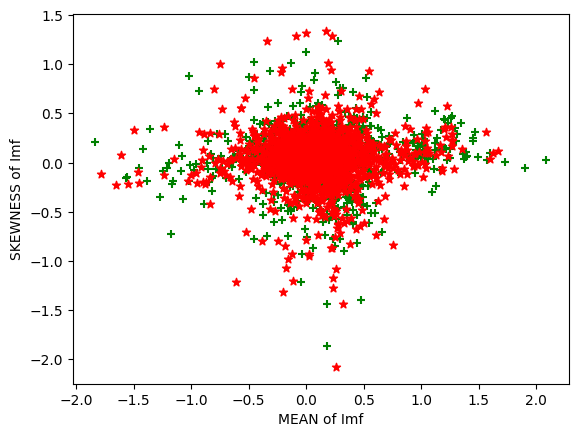

In [ ]:
plt.xlabel('MEAN of Imf')
plt.ylabel('SKEWNESS of Imf')
plt.scatter(df0['Imf_1_SKEWNESS'], df0['Imf_2_SKEWNESS'],color="green",marker='+')
plt.scatter(df1['Imf_1_SKEWNESS'], df1['Imf_2_SKEWNESS'],color="red",marker='*')

Separation of features and labels

In [ ]:
x=df.iloc[:,[1,2,3,4,5,6,7,8]]
y=df.iloc[:,9]

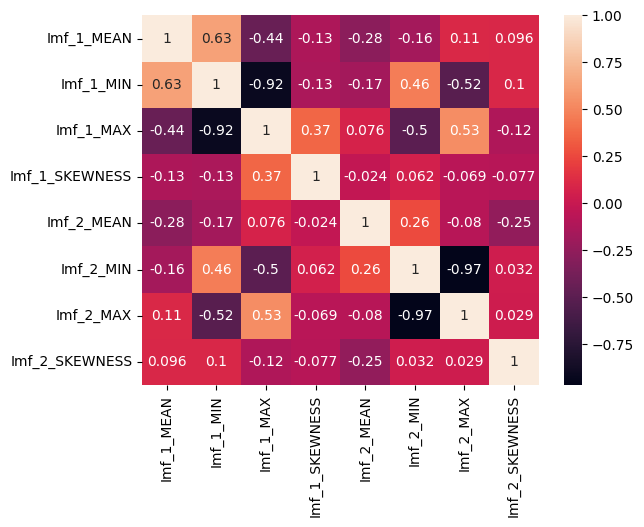

In [ ]:
#plotting the heatmap for correlation between features
ax = sns.heatmap(x.corr(), annot=True)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

# Acc
model.score(X_test, y_test)

0.7943181818181818

Kernelization

In [ ]:
model_k = svm.SVC(kernel='linear')
model_k.fit(X_train, y_train)

# Accuracy on testing
model_k.score(X_test, y_test)

0.7549242424242424

Regularization(C)

In [ ]:
model_C = svm.SVC(C=600)
model_C.fit(X_train, y_train)

# Accuracy on testing
model_C.score(X_test, y_test)

0.8204545454545454

In [ ]:
y_prd = model_C.predict(X_test)
y_prd

array([1, 1, 1, ..., 0, 0, 0])

Saving the model

In [ ]:
import pickle

In [ ]:
with open('SVM_model','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('SVM_Reg','wb') as f:
  pickle.dump(model_C,f)

# **Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prd)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1122  189]
 [ 285 1044]]


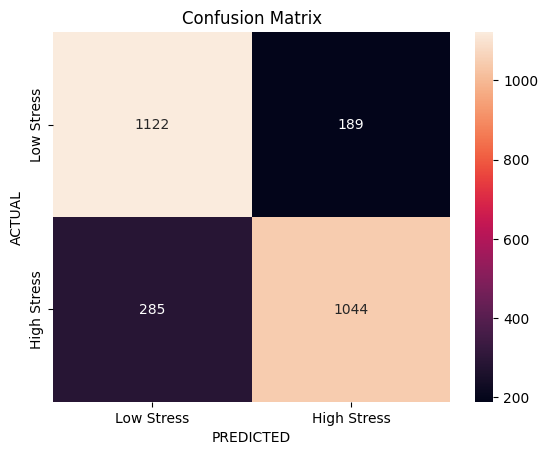

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('PREDICTED');ax.set_ylabel('ACTUAL');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Low Stress', 'High Stress']); ax.yaxis.set_ticklabels(['Low Stress', 'High Stress']);

0 Class-wise Metrics

In [ ]:
prec = cm[0][0]/(cm[0][0]+cm[0][1])
print("Precision:\n",prec)

Precision:
 0.8558352402745996


In [ ]:
rec = cm[0][0]/(cm[0][0]+cm[1][0])
print("Recall : \n",rec)

Recall : 
 0.7974413646055437


In [ ]:
f1_score=(2*prec*rec)/(prec+rec)
f1_score

0.82560706401766

1 Class-wise Metrics

In [ ]:
p = cm[1][1]/(cm[0][1]+cm[1][1])
print("Precision:\n",p)

Precision:
 0.8467153284671532


In [ ]:
r = cm[1][1]/(cm[1][1]+cm[1][0])
print("Recall : \n",r)

Recall : 
 0.7855530474040632


In [ ]:
f1_score=(2*p*r)/(p+r)
f1_score

0.8149882903981265

# Other Metrics and Visualizations